# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import json
from pandas.io.json import json_normalize

plt.rcParams.update({'errorbar.capsize': 2})

Rain data can be found in the url:

'https://www.kaggle.com/city-of-seattle/seattle-observed-monthly-rain-gauge-accumulations/downloads/seattle-observed-monthly-rain-gauge-accumulations.zip/16'

In order to use this data set, it seems necessary to use kaggle access privileges (user and password). Since the file is not too big, it has been downloaded locally. For a more pythonic approach see [link](https://ramhiser.com/2012/11/23/how-to-download-kaggle-data-with-python-and-requests-dot-py/).

In [195]:
# read csv
df = pd.read_csv('rdata/observed-monthly-rain-gauge-accumulations-oct-2002-to-may-2017.csv', parse_dates = ['Date'])

In [196]:
df.isnull().values.any()

False

In [197]:
#with open('rdata/socrata_metadata.json') as f:
#    data2 = json.load(f)     # loads json file as a list

#df2 = json_normalize(data2)  # obtain a Pandas dataframe df from data2

In [198]:
df.Date = df.Date.dt.to_period('m')

In [199]:
df[:2]

,Date,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25
0,2002-11,2.43,3.36,2.88,2.48,0.78,2.49,2.57,2.93,3.25,2.38,2.59,2.46,3.06,2.69,3.59,3.17,3.15
1,2002-12,4.31,1.40,5.46,4.80,1.99,5.06,2.48,2.35,6.48,4.95,5.71,3.57,5.77,3.28,5.77,6.02,5.60


In [200]:
df[-5:]

,Date,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25
170,2017-01,4.24,4.08,4.03,3.95,4.03,4.51,4.00,4.19,3.95,4.01,4.20,4.28,4.06,3.95,3.98,4.02,4.02
171,2017-02,8.36,8.52,8.18,8.11,8.49,8.08,7.90,8.45,9.63,8.91,8.64,9.10,8.71,8.84,8.20,8.76,9.43
172,2017-03,7.19,6.77,6.59,6.71,6.31,7.00,6.54,7.20,7.33,6.53,7.15,7.02,6.64,6.92,5.70,7.38,6.68
173,2017-04,4.84,4.07,3.98,4.32,3.03,4.66,3.75,4.58,4.10,4.44,4.34,3.92,3.52,3.94,3.22,4.31,4.23
174,2017-05,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.14,0.01,0.00,0.02,0.03,0.02,0.01,0.06,0.00


In [201]:
df.columns.values

array(['Date', 'RG01', 'RG02', 'RG03', 'RG04', 'RG05', 'RG07', 'RG08',
       'RG09', 'RG10_30', 'RG11', 'RG12', 'RG14', 'RG15', 'RG16', 'RG17',
       'RG18', 'RG20_25'], dtype=object)

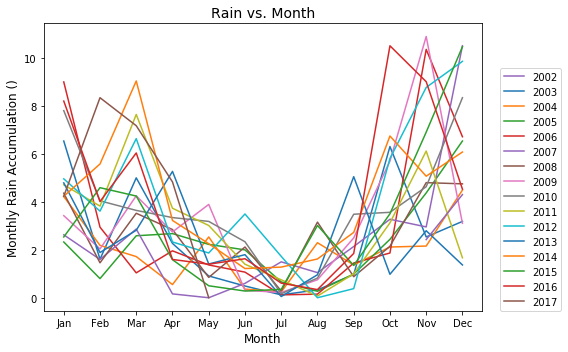

In [202]:
ms = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


gau = 'RG01'

fig, ax = plt.subplots(figsize=(8,5))
#ax.scatter(x= df[2:-5]['Date'], y=df[2:-5]['RG01'])

for i in range(14):
    ax.plot( ms, df[2 + i*12 :14 + 12*i][gau], '-', label = str(2003+i))
ax.plot( ms[-2:], df[:2][gau], '-', label = '2002')
ax.plot( ms[:5], df[-5:][gau], '-', label = '2017')

handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=(1.04,0))

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Monthly Rain Accumulation ()', fontsize=12)
ax.set_title('Rain vs. Month', fontsize=14)
fig.tight_layout()
#fig.savefig("foo.pdf", bbox_inches='tight')

In [9]:
g_ls0 = {'RG01': [47.723171, -122.344869],
'RG34': [47.721047, -122.297255],
'RG07': [47.698155, -122.377202],
'RG04': [47.693098, -122.312376],
'RG31': [47.679249, -122.376515],
'RG02': [47.684314, -122.263389],
'RG08': [47.669102, -122.398144],
'RG09': [47.669687, -122.354430],
'RG33': [47.671243, -122.291088],
'RG03': [47.655143, -122.316757],
'RG12': [47.644352, -122.401996],
'RG11': [47.623110, -122.361345],
'RG35': [47.624400, -122.324136],
'RG25': [47.601904, -122.303216],
'RG14': [47.582478, -122.389871],
'RG15': [47.564480, -122.343413],
'RG32': [47.571812, -122.309345],
'RG36': [47.553404, -122.377642],
'RG18': [47.550242, -122.283580],
'RG05': [47.523647, -122.393155],
'RG17': [47.525156, -122.342448],
'RG16': [47.536280, -122.321310],
'RG30': [47.524410, -122.271842]}

g_ls = {'RG01': [47.723171, -122.344869],
'RG07': [47.698155, -122.377202],
'RG04': [47.693098, -122.312376],
'RG02': [47.684314, -122.263389],
'RG08': [47.669102, -122.398144],
'RG09': [47.669687, -122.354430],
'RG03': [47.655143, -122.316757],
'RG12': [47.644352, -122.401996],
'RG11': [47.623110, -122.361345],
'RG20_25': [47.601904, -122.303216],
'RG14': [47.582478, -122.389871],
'RG15': [47.564480, -122.343413],
'RG18': [47.550242, -122.283580],
'RG05': [47.523647, -122.393155],
'RG17': [47.525156, -122.342448],
'RG16': [47.536280, -122.321310],
'RG10_30': [47.524410, -122.271842]}

In [10]:
def great_circle_dist(lat1,lon1,lat2,lon2):
    """Computes the great circle distance (in km) between
    two points on the earth surface, given the latitude
    and longitude of both points, in degrees."""
    # Mean Earth radius in km
    r = 6371.0088
    
    # Converts to rads
    lat1 = lat1*np.pi/180
    lon1 = lon1*np.pi/180
    lat2 = lat2*np.pi/180
    lon2 = lon2*np.pi/180
    
    sqrt_2 = np.sin((lat2-lat1)/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin((lon2-lon1)/2)**2
    d = 2*r*np.arcsin(np.sqrt(sqrt_2))
    
    return d

def closest_g(lat,lon):
    """Finds the closest rain gauge given the the latitude
    and longitude of a point in degrees."""
    t_dict = {}
    for k, v in g_ls.items():
        t_dict[k] = great_circle_dist(lat,lon,v[0],v[1])
    return sorted(t_dict, key = t_dict.get)[0]

In [183]:
# read csv
#df_fire_10_11 = pd.read_csv('fdata/Seattle_Fire_911_Calls_from_3_1_2010_to_3_1_2011.csv', parse_dates=True)

url = 'https://data.seattle.gov/api/views/d9j6-s59d/rows.csv?accessType=DOWNLOAD'
df_fire_10_11 = pd.read_csv(url, parse_dates = ['Datetime'])
#url = 'https://data.seattle.gov/api/views/kzjm-xkqj/rows.csv?accessType=DOWNLOAD'
#df_fire_10_11 = pd.read_csv(url, usecols = ['Type','Datetime','Latitude','Longitude'], dtype={'Type': str, 'Latitude': float, 'Longitude': float}, nrows=100, skiprows=[1])

In [184]:
df_fire_10_11.isnull().values.any()

False

In [185]:
df_fire_10_11['C_gauge'] = df_fire_10_11.apply(lambda row: closest_g(row.Latitude,row.Longitude), axis=1)

In [186]:
df_fire_10_11.head()

,Type,Datetime,Latitude,Longitude,C_gauge
0,Aid Response,2010-12-09 15:36:00,47.503741,-122.259489,RG10_30
1,Medic Response,2010-12-09 03:35:00,47.602172,-122.330863,RG20_25
2,Aid Response,2010-12-09 03:25:00,47.661290,-122.316335,RG03
3,Aid Response,2010-12-09 03:23:00,47.625482,-122.321324,RG20_25
4,Aid Response,2010-12-08 23:55:00,47.612136,-122.335373,RG11


In [187]:
df_fire_10_11_S = df_fire_10_11[['Datetime','C_gauge']][df_fire_10_11['Type'].str.contains('Fire')]

In [188]:
df_fire_10_11_S.head()

,Datetime,C_gauge
8,2010-12-07 06:37:00,RG11
16,2010-12-05 17:46:00,RG12
33,2010-11-26 02:02:00,RG11
35,2010-11-25 21:51:00,RG20_25
67,2011-03-01 22:26:00,RG11


In [190]:
df_fire_10_11_S.Datetime = df_fire_10_11_S.Datetime.dt.to_period('m')

In [240]:
#df_fire_10_11_S.to_csv('fdata/fire_10_11_S.csv', encoding='utf-8', index=False)

In [191]:
df_fire_10_11_S.head()

,Datetime,C_gauge
8,2010-12,RG11
16,2010-12,RG12
33,2010-11,RG11
35,2010-11,RG20_25
67,2011-03,RG11


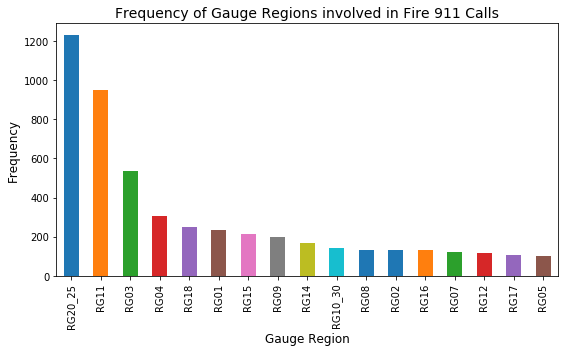

In [241]:
fig, ax = plt.subplots(figsize=(8,5))
df_fire_10_11_S['C_gauge'].value_counts().plot(kind='bar')
ax.set_xlabel('Gauge Region', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Frequency of Gauge Regions involved in Fire 911 Calls', fontsize=14)
fig.tight_layout()

In [286]:
df_fire_10_11_F = df_fire_10_11_S.pivot_table(index='Datetime', columns='C_gauge', aggfunc=len, fill_value=0).reset_index().rename_axis(None, axis=1)

In [287]:
df_fire_10_11_F

,Datetime,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25
0,2010-06,2,0,1,1,0,0,0,2,1,8,1,1,2,0,0,1,13
1,2010-07,36,19,92,48,13,22,17,19,24,125,14,29,30,22,19,32,182
2,2010-08,29,22,63,35,22,9,12,24,21,92,19,24,29,9,8,34,121
3,2010-09,28,17,59,20,13,12,10,24,17,124,11,27,18,9,12,29,157
4,2010-10,22,11,89,37,13,15,18,24,21,135,15,16,15,12,19,37,166
5,2010-11,32,16,55,42,5,10,19,23,15,100,15,18,39,32,6,27,110
6,2010-12,28,18,58,38,15,22,27,26,19,119,22,14,24,15,13,34,154
7,2011-01,31,17,64,40,14,14,15,35,14,116,11,21,32,15,17,36,163
8,2011-02,26,12,51,40,4,16,14,23,12,124,8,20,27,16,12,19,153
9,2011-03,0,0,1,2,0,0,0,0,0,6,0,0,0,1,1,2,9


In [288]:
df_fire_10_11_F_trans = df_fire_10_11_F.set_index('Datetime').T.reset_index().rename_axis(None, axis=1).rename(columns={'index': 'C_gauge'})

In [289]:
df_fire_10_11_F_trans

,C_gauge,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03
0,RG01,2,36,29,28,22,32,28,31,26,0
1,RG02,0,19,22,17,11,16,18,17,12,0
2,RG03,1,92,63,59,89,55,58,64,51,1
3,RG04,1,48,35,20,37,42,38,40,40,2
4,RG05,0,13,22,13,13,5,15,14,4,0
5,RG07,0,22,9,12,15,10,22,14,16,0
6,RG08,0,17,12,10,18,19,27,15,14,0
7,RG09,2,19,24,24,24,23,26,35,23,0
8,RG10_30,1,24,21,17,21,15,19,14,12,0
9,RG11,8,125,92,124,135,100,119,116,124,6


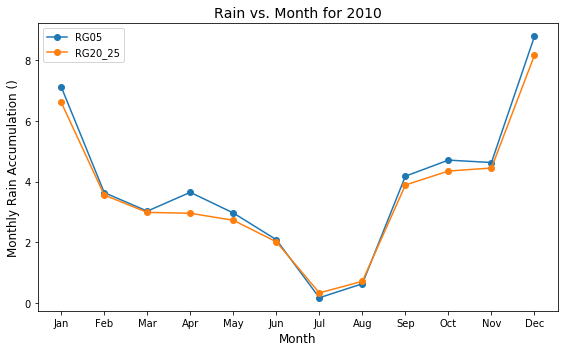

In [242]:
gau = 'RG05'

fig, ax = plt.subplots(figsize=(8,5))

ax.plot( ms, df[2 + 7*12 :14 + 12*7]['RG05'], 'o-', label='RG05')
ax.plot( ms, df[2 + 7*12 :14 + 12*7]['RG20_25'], 'o-', label='RG20_25')

handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Monthly Rain Accumulation ()', fontsize=12)
ax.set_title('Rain vs. Month for 2010', fontsize=14)
fig.tight_layout()
#fig.savefig("foo.pdf", bbox_inches='tight')

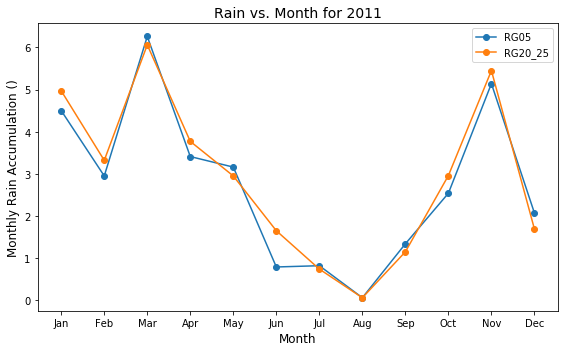

In [243]:
gau = 'RG05'

fig, ax = plt.subplots(figsize=(8,5))

ax.plot( ms, df[2 + 8*12 :14 + 12*8]['RG05'], 'o-', label='RG05')
ax.plot( ms, df[2 + 8*12 :14 + 12*8]['RG20_25'], 'o-', label='RG20_25')

handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Monthly Rain Accumulation ()', fontsize=12)
ax.set_title('Rain vs. Month for 2011', fontsize=14)
fig.tight_layout()
#fig.savefig("foo.pdf", bbox_inches='tight')

In [314]:
dates_f_date = []

#for i in range(7,13):
#    dates_f_date.append(ms[i-1]+' 2010')
    
#for i in range(1,3):
#    dates_f_date.append(ms[i-1]+' 2011')
    
for i in range(7,13):
    dates_f_date.append('2010-'+str(i).zfill(2) )
    
for i in range(1,3):
    dates_f_date.append('2011-'+str(i).zfill(2) )

In [315]:
dates_f_date

['2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02']

In [281]:
df_fire_10_11_F_trans.columns

Index(['C_gauge',   2010-06,   2010-07,   2010-08,   2010-09,   2010-10,
         2010-11,   2010-12,   2011-01,   2011-02,   2011-03],
      dtype='object')

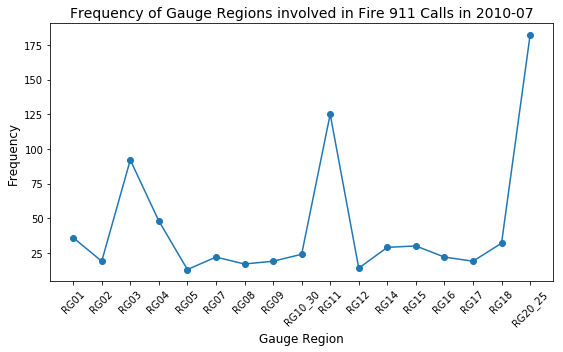

In [317]:
j=0

fig, ax = plt.subplots(figsize=(8,5))
#f_data_per_month[j].plot(kind='bar')
ax.plot( df_fire_10_11_F_trans['C_gauge'], df_fire_10_11_F_trans.iloc[:, [2+j]], 'o-')
ax.set_xlabel('Gauge Region', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Frequency of Gauge Regions involved in Fire 911 Calls in '+ dates_f_date[j], fontsize=14)
plt.xticks(rotation=45)
fig.tight_layout()

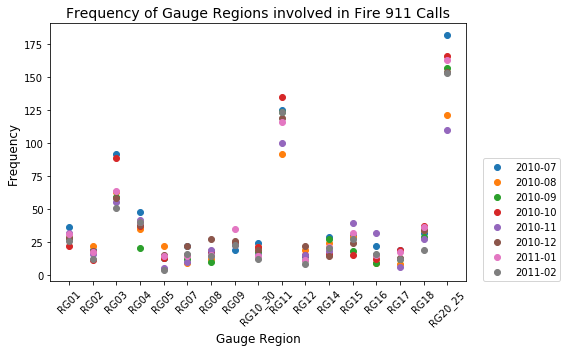

In [318]:
fig, ax = plt.subplots(figsize=(8,5))
#f_data_per_month[j].plot(kind='bar')

for j in range(8):
    ax.plot( df_fire_10_11_F_trans['C_gauge'], df_fire_10_11_F_trans.iloc[:, [2+j]], 'o', label = dates_f_date[j])
    
handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=(1.04,0))

ax.set_xlabel('Gauge Region', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Frequency of Gauge Regions involved in Fire 911 Calls', fontsize=14)
plt.xticks(rotation=45)
fig.tight_layout()